In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
import pandas as pd
import pickle
from sklearn.neural_network import MLPRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


In [2]:
Dados = pd.read_csv(r'C:\Users\Mateus\Meu Drive\Compartilhado\eng\9_periodo\Controle inteligente\Trabalho 3\PenduloInvertidoFuzzyArtigo.csv', on_bad_lines='skip', header=None)
# Dados.values
# Dados.head(5)
# print(Dados)

Entradas = Dados.iloc[:,:-1]
Entradas.shape
Saidas = Dados.iloc[:,4]

In [3]:
Dados

,0,1,2,3,4
0,-0.514756,-5.057626,0.013547,7.678928,-522.084200
1,-0.565332,0.143587,0.090337,-0.120185,533.101514
2,-0.563896,0.880795,0.089135,-1.208226,75.674807
3,-0.555088,0.331017,0.077053,-0.373748,-56.326216
4,-0.551778,0.115740,0.073315,-0.040475,-22.019596
...,...,...,...,...,...
13154,-0.004212,0.003572,-0.000093,-0.000400,-0.001877
13155,-0.004177,0.003554,-0.000097,-0.000387,-0.001901
13156,-0.004141,0.003536,-0.000101,-0.000374,-0.001925
13157,-0.004106,0.003518,-0.000105,-0.000361,-0.001947


In [4]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(Entradas,Saidas,test_size=0.33)

In [37]:
rede=MLPRegressor(hidden_layer_sizes=[128,128,256,256,256],
                  activation='relu',
                  max_iter=90000)
rede.fit(Xtrain,Ytrain)

MLPRegressor(hidden_layer_sizes=[128, 128, 256, 256, 256], max_iter=90000)

In [38]:
r2train=rede.score(Xtrain, Ytrain)
print("R2 Score do treinamento: ", r2train)
r2test=rede.score(Xtest, Ytest)
print("R2 Score do teste: ", r2test)

R2 Score do treinamento:  0.8135786528679112
R2 Score do teste:  0.8318695171311343


In [32]:
Xtest.shape

(4343, 4)

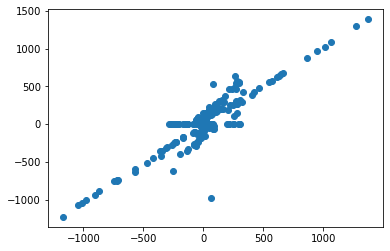

In [33]:
Ypred=rede.predict(Xtest)
plt.scatter(Ypred,Ytest)
#plt.scatter(Xtest,Ypred)
plt.show()

In [36]:
dif=Ypred-Ytest
dif.shape

(4343,)

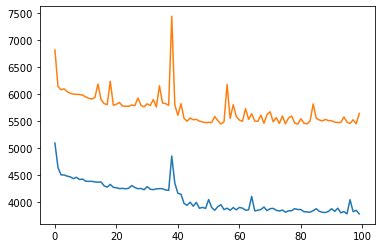

In [50]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

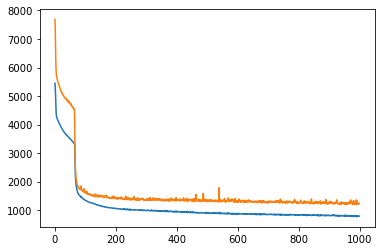

In [17]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

In [30]:
modelo.save(r'C:\Users\Mateus\Desktop\Trabalho 3\teste2.h5')

In [34]:
Ypredi=modelo.predict(Xtest)

136/136 [==============================] - 0s 1ms/step


In [37]:
#Ypredi=np.round(Ypredi)
Ypredi
Ypredi.reshape(-1,1)

array([[-0.20280299],
       [-0.27898413],
       [-0.25430423],
       ...,
       [ 4.841336  ],
       [ 4.860082  ],
       [ 4.7861333 ]], dtype=float32)